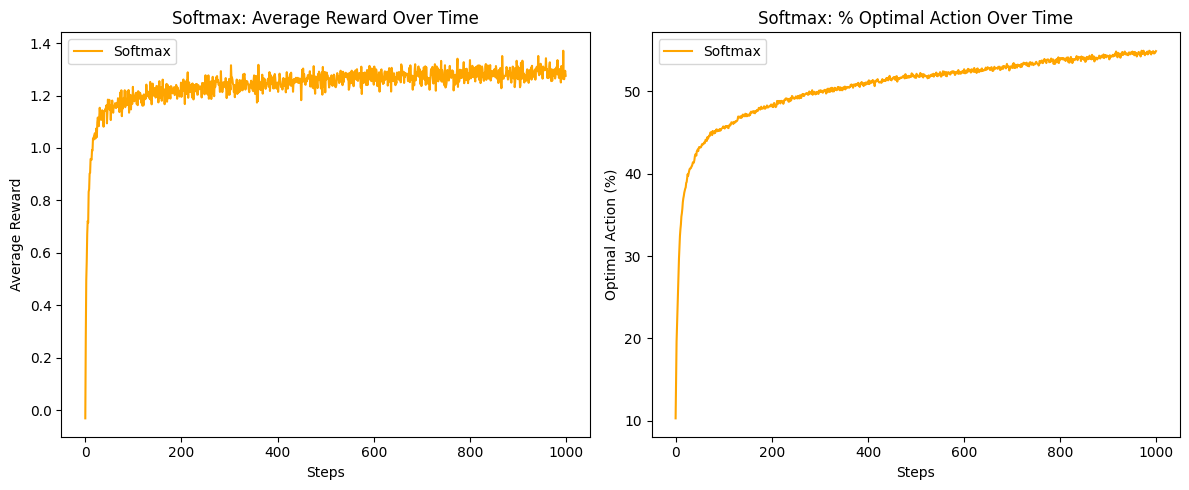

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(q_values, tau):
    exp_q = np.exp(q_values / tau)
    return exp_q / np.sum(exp_q)

def softmax_bandit(k=10, tau=0.1, steps=1000, runs=2000):
    rewards = np.zeros((runs, steps))
    optimal_action_counts = np.zeros((runs, steps))

    for run in range(runs):
        q_true = np.random.randn(k)
        q_est = np.zeros(k)
        action_count = np.zeros(k)
        optimal_action = np.argmax(q_true)

        for t in range(steps):
            probs = softmax(q_est, tau)
            action = np.random.choice(k, p=probs)

            reward = np.random.randn() + q_true[action]
            action_count[action] += 1
            q_est[action] += (reward - q_est[action]) / action_count[action]

            rewards[run, t] = reward
            if action == optimal_action:
                optimal_action_counts[run, t] = 1

    avg_rewards = rewards.mean(axis=0)
    optimal_action_perc = optimal_action_counts.mean(axis=0) * 100

    return avg_rewards, optimal_action_perc

# 執行並繪圖
avg_rewards, optimal_action_perc = softmax_bandit(tau=0.1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards, label="Softmax", color='orange')
plt.title("Softmax: Average Reward Over Time")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(optimal_action_perc, label="Softmax", color='orange')
plt.title("Softmax: % Optimal Action Over Time")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.legend()

plt.tight_layout()
plt.show()